In [ ]:
%cd ..
from google.colab import drive
drive.mount("content/gdrive")

/
Mounted at content/gdrive


In [ ]:
# rename path
!ln -s /content/gdrive/My\ Drive/ /mydrive
#!ls

ln: failed to create symbolic link '/mydrive/My Drive': File exists


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
path = "/mydrive/Data_Science_Projects/Ads_Optmization_Reinforcement/data/"
df = pd.read_csv(path + "Ads_Optimization.csv")
print(df.shape)
print(df.info())
print(df.describe())

(10000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB
None
               Ad 1          Ad 2  ...          Ad 9        Ad 10
count  10000.000000  10000.000000  ...  10000.000000  10000.00000
mean       0.170300      0.129500  ...      0.095200      0.04890
std        0.375915      0.335769  ...      0.293506      0.21567
min        0.000000      0.000000  ...      0.000000      0.00000
25%        0.000000      0.000000  ...      0.000000      0.00000
50%        0.00000

In [ ]:
# upper confidence bound
import math

number_ads = 10
observations = 1000
numbers_selections = [0] * number_ads
sum_rewards = [0] * number_ads
total_reward = 0
selected_ads = []

for n in range(0, observations):
  ads = 0
  max_upper_bound = 0
  for i in range(0, number_ads):

    if numbers_selections[i] > 0:
      average = sum_rewards[i]/numbers_selections[i]
      delta = math.sqrt(3/2 * math.log(n + 1) / numbers_selections[i])
      upper_bound = average + delta
    else:
      upper_bound = 1e400
    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ads = i

  selected_ads.append(ads)
  numbers_selections[ads]  = numbers_selections[ads] + 1
  reward = df.values[n, ads]
  sum_rewards[ads] = sum_rewards[ads] + reward
  total_reward = total_reward + reward

print("Rewards by ads: ", sum_rewards)
print("Rewards by UCB: ", total_reward)
print("Ads selected: ", selected_ads)

Rewards by ads:  [17, 8, 1, 5, 79, 1, 10, 27, 4, 3]
Rewards by UCB:  155
Ads selected:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4, 0, 7, 1, 1, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 7, 7, 7, 7, 7, 4, 2, 3, 5, 9, 1, 6, 8, 0, 0, 7, 0, 4, 1, 6, 8, 2, 3, 5, 9, 7, 0, 4, 4, 4, 7, 7, 7, 7, 1, 6, 8, 2, 3, 5, 9, 0, 7, 7, 4, 7, 7, 7, 1, 6, 8, 0, 4, 4, 2, 3, 5, 9, 4, 7, 0, 7, 1, 1, 1, 6, 6, 6, 6, 6, 8, 4, 2, 3, 5, 9, 7, 7, 7, 0, 6, 4, 1, 1, 1, 8, 7, 2, 3, 5, 9, 4, 0, 1, 1, 1, 6, 7, 8, 4, 1, 2, 3, 5, 9, 0, 6, 7, 8, 4, 7, 1, 0, 6, 2, 3, 5, 9, 7, 7, 7, 7, 4, 4, 4, 4, 4, 7, 8, 1, 0, 6, 6, 6, 7, 4, 2, 3, 5, 9, 1, 6, 8, 7, 0, 4, 4, 4, 4, 4, 2, 3, 5, 9, 1, 6, 7, 4, 8, 0, 7, 4, 4, 4, 1, 6, 2, 3, 5, 9, 0, 0, 0, 7, 8, 4, 0, 0, 0, 1, 6, 7, 4, 2, 3, 5, 9, 0, 8, 7, 1, 6, 4, 0, 7, 7, 7, 7, 7, 2, 3, 5, 9, 8, 4, 1, 6, 6, 6, 7, 7, 7, 0, 6, 7,

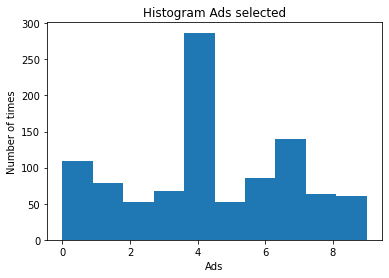

In [ ]:
# visualize
plt.hist(selected_ads)
plt.title("Histogram Ads selected")
plt.xlabel("Ads")
plt.ylabel("Number of times")
plt.show()